In [ ]:
####VERİ ÖN İŞLEME

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/python_final')

In [3]:
!pwd

/content/drive/My Drive/Colab Notebooks/python_final


In [4]:
import json
import pandas as pd
from pprint import pprint

In [5]:
df = pd.read_json("dataset.json")
df.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw1133942,OriginalMovieBuff21,Kill Bill: Vol. 2 (2004),8.0,Good follow up that answers all the questions,24 July 2005,0,"After seeing Tarantino's Kill Bill Vol: 1, I g...","[0, 1]"
1,rw1133943,sentra14,Journey to the Unknown (1968– ),NaN,Excellent series,24 July 2005,0,"I have the entire series on video, taped mostl...","[11, 11]"
2,rw1133946,GreenwheelFan2002,The Island (2005),9.0,"Not just about action, but about survival...",24 July 2005,0,Once again the critics prove themselves as mor...,"[2, 5]"
3,rw1133948,itsascreambaby,Win a Date with Tad Hamilton! (2004),3.0,Falls under the category: seen it a million ti...,24 July 2005,0,This IS a film that has been done too many tim...,"[2, 3]"
4,rw1133949,OriginalMovieBuff21,Saturday Night Live: The Best of Chris Farley ...,10.0,"Before Tommy Boy and Black Sheep, there was Sa...",24 July 2005,0,Chris Farley is one of my favorite comedians a...,"[4, 4]"


In [6]:
f = open("pos_neg_words.json")
pos_neg_words = json.load(f)
print(pos_neg_words['positives'])
print(pos_neg_words['negatives'])


##EXCELDEN ÇEKTİĞİM VERİLERİ JSON YAPMA

# positive_list = []
# for item, value in pos_neg_words['positives'].items():
#   positive_list.append(value)

# # print(positive_list)

# negative_list = []
# for item, value in pos_neg_words['negatives'].items():
#   negative_list.append(value)

# # print(negative_list)


# pos_neg_words['positives'] = positive_list
# pos_neg_words['negatives'] = negative_list
# print(pos_neg_words)

# with open("data.json", "w") as f:
#   json.dump(pos_neg_words, f)

['able', 'abundance', 'accelerate', 'accept', 'acclaim', 'accolade', 'accomplish', 'accord', 'accredit', 'accrue', 'ace', 'achieve', 'action', 'activate', 'active', 'add', 'addition', 'adept', 'admirable', 'adorable', 'advance', 'advantage', 'adventure', 'affable', 'affirm', 'ageless', 'agree', 'agreeable', 'aid', 'aim', 'alacrity', 'alert', 'alight', 'alive', 'all', 'altruistic', 'always', 'amaze', 'amazement', 'amazing', 'ambition', 'amiable', 'amity', 'amuse', 'anew', 'angel', 'appealing', 'applaud', 'appreciate', 'approve', 'arouse', 'art', 'as', 'ascend', 'aspire', 'assent', 'assert', 'assist', 'associate', 'assure', 'astir', 'astonish', 'attain', 'attempt', 'attention', 'attentive', 'attest', 'attraction', 'attribute', 'attune', 'augment', 'auspicious', 'authentic', 'available', 'avid', 'awake', 'award', 'aware', 'awash', 'awesome', 'aye', 'back', 'balance', 'balanced', 'beatific', 'beatify', 'beatitude', 'beau', 'beauteous', 'beautiful', 'beautify', 'beauty', 'become', 'befriend

In [7]:
f1 = open("dataset.json")
reviews = json.load(f1)

In [8]:
def calculate_pos_neg(reviews, pos_neg_words):
  for review in reviews:
    positive_count = 0
    negative_count = 0
    words_of_review = review['review_detail'].split()
    for word in words_of_review:
      if word.lower() in pos_neg_words['positives']:
        positive_count += 1
      elif word.lower() in pos_neg_words['negatives']:
        negative_count += 1

      review['positive_word_count'] = positive_count
      review['negative_word_count'] = negative_count

In [9]:
calculate_pos_neg(reviews, pos_neg_words)
pprint(reviews[0])

{'helpful': ['0', '1'],
 'movie': 'Kill Bill: Vol. 2 (2004)',
 'negative_word_count': 6,
 'positive_word_count': 35,
 'rating': '8',
 'review_date': '24 July 2005',
 'review_detail': "After seeing Tarantino's Kill Bill Vol: 1, I got to watch "
                  'Vol. 2 the next day after seeing it. I liked the first one '
                  "but didn't really know everything that was going on, but "
                  'just knowing that she set off the kill 5 individuals who '
                  'left her dead at her wedding. So I saw Kill Bill: Vol 2 and '
                  'liked it highly. The movie answered all of my questions to '
                  'the previous one and had much of a better story and was not '
                  'unrealistic that much. We finally get to see Bill, who is '
                  'played by David Carradine who had a really good role in the '
                  'movie. There is a great conclusion to the movie and had a '
                  'very good story, alo

In [11]:
len(reviews)

100000

In [12]:
####BOŞ(RATING DEĞERİ BOŞ OLANLARI) KALDIRDIM
for index, review in enumerate(reviews):
  if review['rating'] is None:
    reviews.pop(index)
#### KULLANMAYACAĞIM SÜTUNLARI ÇIKARTTIM
  if 'helpful' in review.keys():
    del review['spoiler_tag']
    del review['reviewer']
    del review['review_summary']
    del review['helpful']
    del review['review_date']
    del review['review_detail']

In [13]:
with open("imdb_reviews.json", "w", encoding="utf-8") as f:
   json.dump(reviews, f, indent=4, ensure_ascii=False)

In [ ]:
#NAIVE BAYES YÖNTEMİYLE SINIFLANDIRMA

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
dataset = pd.read_json('imdb_reviews.json')
dataset.head()

,review_id,movie,rating,positive_word_count,negative_word_count
0,rw1133942,Kill Bill: Vol. 2 (2004),8.0,35,6
1,rw1133948,Win a Date with Tad Hamilton! (2004),3.0,36,3
2,rw1133949,Saturday Night Live: The Best of Chris Farley ...,10.0,31,3
3,rw1133950,Outlaw Star (1998– ),10.0,69,9
4,rw1133952,The Aviator (2004),10.0,53,2


In [16]:
dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna()

In [17]:
df2=dataset.loc[dataset['rating'] < 5, 'movie']
df2

1        Win a Date with Tad Hamilton! (2004)
6                The Amityville Horror (2005)
9              The Truth About Charlie (2002)
10                       Trainspotting (1996)
11                          Feardotcom (2002)
                         ...                 
77706              The Horse Whisperer (1998)
77711                       Wolf Creek (2005)
77727                  The Incredibles (2004)
77730                         Elephant (2003)
77731                         Æon Flux (2005)
Name: movie, Length: 16201, dtype: object

In [18]:
dataset

,review_id,movie,rating,positive_word_count,negative_word_count
0,rw1133942,Kill Bill: Vol. 2 (2004),8.0,35,6
1,rw1133948,Win a Date with Tad Hamilton! (2004),3.0,36,3
2,rw1133949,Saturday Night Live: The Best of Chris Farley ...,10.0,31,3
3,rw1133950,Outlaw Star (1998– ),10.0,69,9
4,rw1133952,The Aviator (2004),10.0,53,2
...,...,...,...,...,...
77733,rw1251329,Terminator 3: Rise of the Machines (2003),5.0,50,7
77734,rw1251330,Brokeback Mountain (2005),10.0,32,4
77735,rw1251331,Eternal Sunshine of the Spotless Mind (2004),9.0,92,18
77736,rw1251332,Summer's Lease (1989– ),10.0,31,2


In [19]:
X = dataset[['rating' ,'positive_word_count', 'negative_word_count']]
y = dataset.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
datas = {
    'X_train' : X_train,
    'X_test' : X_test,
    'y_train' : y_train,
    'y_test' : y_test,
}

In [20]:
X_train

,rating,positive_word_count,negative_word_count
11299,10.0,51,8
73194,5.0,31,6
30998,9.0,39,4
72359,7.0,168,20
16426,9.0,49,1
...,...,...,...
6265,10.0,32,3
54887,6.0,80,5
76823,3.0,231,18
860,4.0,34,4


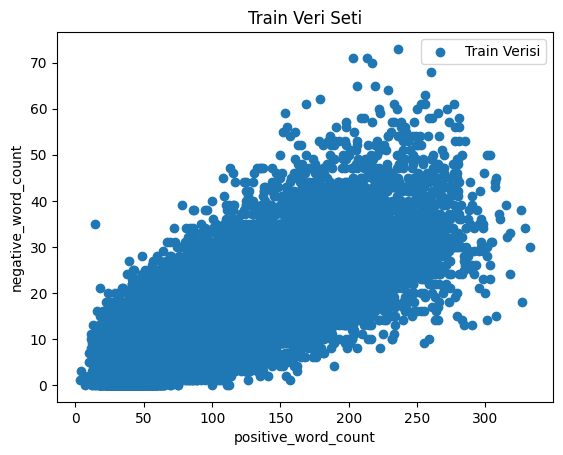

In [21]:
# Train setini görselleştirme
plt.scatter(X_train['positive_word_count'], X_train['negative_word_count'], label='Train Verisi')
plt.xlabel('positive_word_count')
plt.ylabel('negative_word_count')
plt.title('Train Veri Seti')
plt.legend()
plt.show()

In [22]:
X_test

,rating,positive_word_count,negative_word_count
32741,7.0,72,11
7299,9.0,95,9
26213,9.0,91,8
71116,9.0,37,6
40188,8.0,105,7
...,...,...,...
29276,10.0,39,7
2688,10.0,37,3
48632,10.0,191,37
13464,7.0,46,2


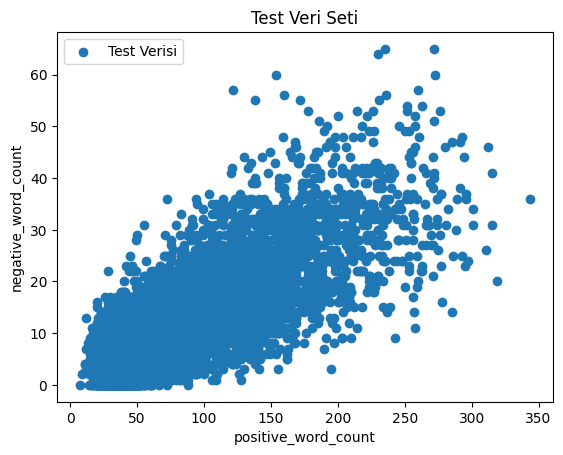

In [23]:
# Test setini görselleştirme
plt.scatter(X_test['positive_word_count'], X_test['negative_word_count'], label='Test Verisi')
plt.xlabel('positive_word_count')
plt.ylabel('negative_word_count')
plt.title('Test Veri Seti')
plt.legend()
plt.show()

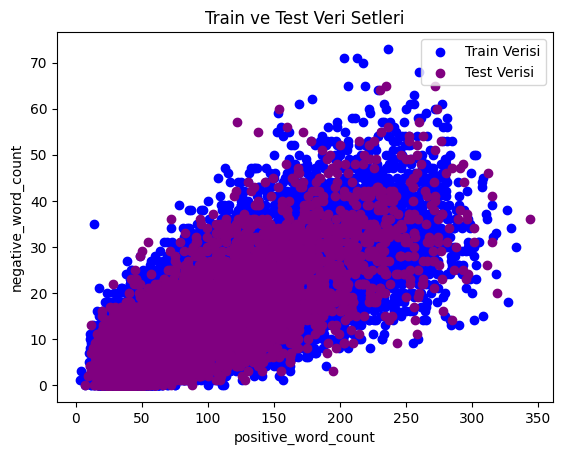

In [25]:
import matplotlib.pyplot as plt

# Train setini görselleştirme
plt.scatter(X_train['positive_word_count'], X_train['negative_word_count'], label='Train Verisi', color='blue')
# Test setini görselleştirme
plt.scatter(X_test['positive_word_count'], X_test['negative_word_count'], label='Test Verisi', color='purple')

plt.xlabel('positive_word_count')
plt.ylabel('negative_word_count')
plt.title('Train ve Test Veri Setleri')
plt.legend()
plt.show()


bernoulli accuracy: 0.7959091786196694
bernoulli precision: 1.0
bernoulli recall: 0.7959091786196694
multinomial accuracy: 0.8861516691323085
multinomial precision: 0.9397931145951188
multinomial recall: 0.9189979453137348
gaussian accuracy: 1.0
gaussian precision: 1.0
gaussian recall: 1.0


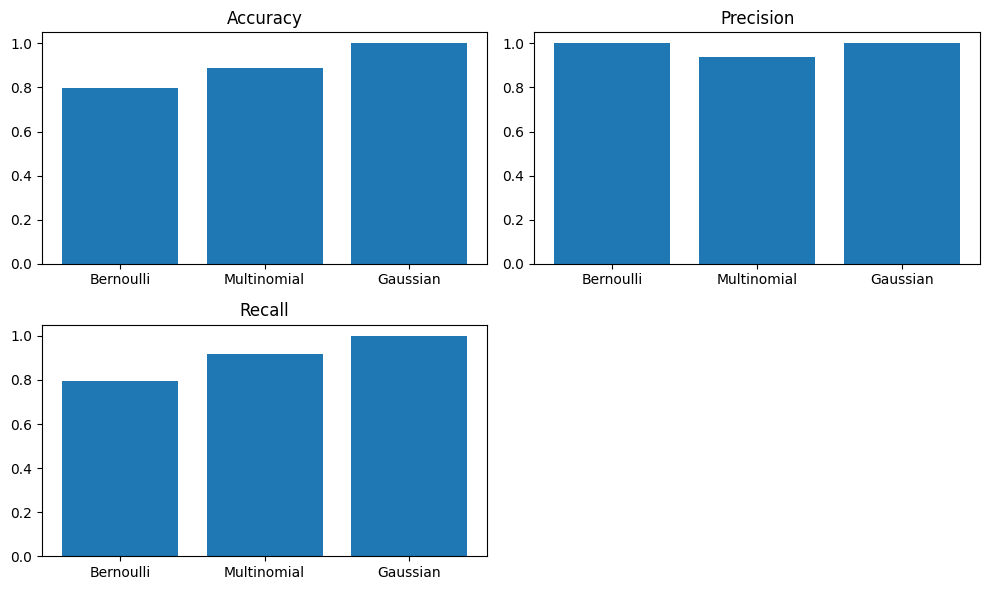

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Modelleri oluşturma
bernoulli_model = BernoulliNB()
multinomial_model = MultinomialNB()
gaussian_model = GaussianNB()

# Modelleri eğitme
bernoulli_model.fit(X_train, y_train)
multinomial_model.fit(X_train, y_train)
gaussian_model.fit(X_train, y_train)

# Modellerin performansını hesaplama
accuracy_score=[]
precision_score=[]
recall_score=[]

def calculate_metrics(dataframe):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for index in dataframe.index:
    rating = dataframe['rating'][index]
    prediction = dataframe['prediction'][index]
    if rating > 4 and rating <= 10:
      if prediction > 4 and prediction <= 10:
        tp += 1
      else:
        fp += 1
    elif rating <= 5 and rating >= 0:
      if prediction <= 5 and prediction >= 0:
        tn += 1
      else:
        fn += 1
  return tp, fp, tn, fn


#Bernoulli için
bernoulli_pred = bernoulli_model.predict(X_test)
bernoulli_pred=bernoulli_pred.tolist()
pred_with_datas1=X_test.copy()
pred_with_datas1['prediction']=bernoulli_pred

tp, fp, tn, fn  = calculate_metrics(pred_with_datas1)
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall =  tp / (tp + fn)

accuracy_score.append(accuracy)
precision_score.append(precision)
recall_score.append(recall)

print(f"bernoulli accuracy: {accuracy}")
print(f"bernoulli precision: {precision}")
print(f"bernoulli recall: {recall}")



#Multinominal için
multinomial_pred = multinomial_model.predict(X_test)
multinomial_pred=multinomial_pred.tolist()
pred_with_datas2=X_test.copy()
pred_with_datas2['prediction']=multinomial_pred
tp, fp, tn, fn  = calculate_metrics(pred_with_datas2)
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall =  tp / (tp + fn)

accuracy_score.append(accuracy)
precision_score.append(precision)
recall_score.append(recall)

print(f"multinomial accuracy: {accuracy}")
print(f"multinomial precision: {precision}")
print(f"multinomial recall: {recall}")


#Gaussian için
gaussian_pred = gaussian_model.predict(X_test)
gaussian_pred=gaussian_pred.tolist()
pred_with_datas3=X_test.copy()
pred_with_datas3['prediction']=gaussian_pred
tp, fp, tn, fn  = calculate_metrics(pred_with_datas3)
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall =  tp / (tp + fn)

accuracy_score.append(accuracy)
precision_score.append(precision)
recall_score.append(recall)

print(f"gaussian accuracy: {accuracy}")
print(f"gaussian precision: {precision}")
print(f"gaussian recall: {recall}")


# Grafik oluşturma
models = ['Bernoulli', 'Multinomial', 'Gaussian']

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracy_score)
plt.title('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precision_score)
plt.title('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recall_score)
plt.title('Recall')

plt.tight_layout()
plt.show()


In [27]:
# Naive Bayes modelini eğitme
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred=model.predict(X_test)
print(y_test)

32741     7.0
7299      9.0
26213     9.0
71116     9.0
40188     8.0
         ... 
29276    10.0
2688     10.0
48632    10.0
13464     7.0
197       7.0
Name: rating, Length: 15547, dtype: float64


In [29]:
y_pred=y_pred.tolist()
pred_with_datas=X_test.copy()
pred_with_datas['prediction']=y_pred
pred_with_datas

,rating,positive_word_count,negative_word_count,prediction
32741,7.0,72,11,8.0
7299,9.0,95,9,8.0
26213,9.0,91,8,8.0
71116,9.0,37,6,10.0
40188,8.0,105,7,8.0
...,...,...,...,...
29276,10.0,39,7,10.0
2688,10.0,37,3,10.0
48632,10.0,191,37,3.0
13464,7.0,46,2,10.0


In [30]:
with open('naive_bayes(2)','w')as file:
  pred_with_datas.to_json(file,orient='records')

In [31]:
def calculate_metrics(dataframe):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for index in dataframe.index:
    rating = dataframe['rating'][index]
    prediction = dataframe['prediction'][index]
    if rating > 4 and rating <= 10:
      if prediction > 4 and prediction <= 10:
        tp += 1
      else:
        fp += 1
    elif rating <= 5 and rating >= 0:
      if prediction <= 5 and prediction >= 0:
        tn += 1
      else:
        fn += 1
  return tp, fp, tn, fn

In [32]:
tp, fp, tn, fn  = calculate_metrics(pred_with_datas)
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall =  tp / (tp + fn)
f1 = 2 * (accuracy * recall) / (accuracy + recall)

In [33]:
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

accuracy: 0.8861516691323085
precision: 0.9397931145951188
recall: 0.9189979453137348
f1: 0.902275973860304


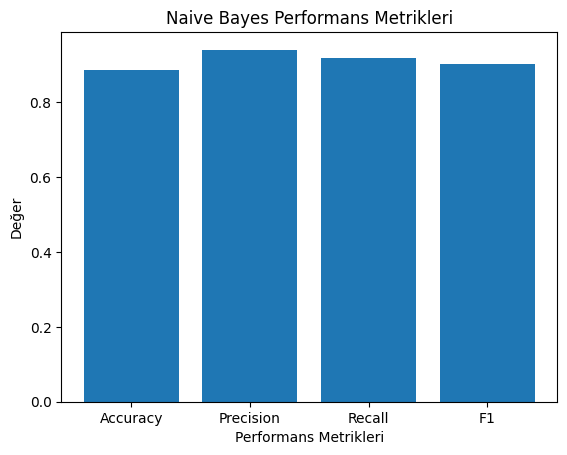

In [34]:
performans_metrikleri = ['Accuracy', 'Precision', 'Recall','F1']
değerler = [accuracy, precision, recall, f1]

plt.bar(performans_metrikleri , değerler)
plt.xlabel('Performans Metrikleri')
plt.ylabel('Değer')
plt.title('Naive Bayes Performans Metrikleri')

plt.show()

In [ ]:
#VERİLERİN GÖRSELLEŞTİRİLMESİ

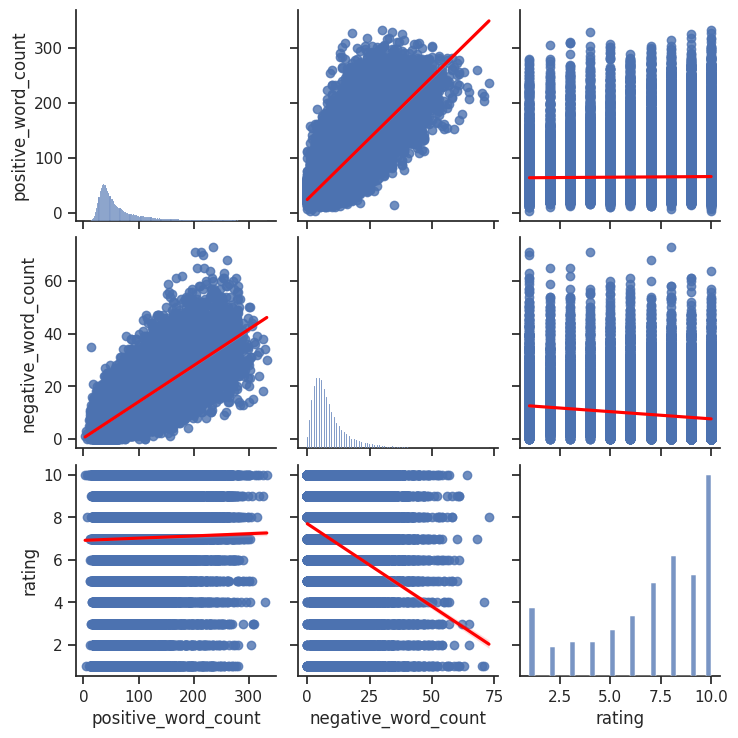

In [35]:
import seaborn as sns

# Concatenate the features and labels into a single DataFrame
data = pd.concat([X_train[['positive_word_count', 'negative_word_count']], y_train], axis=1)

# Create the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, kind="reg", plot_kws={'line_kws': {'color':'red'}})
plt.show()

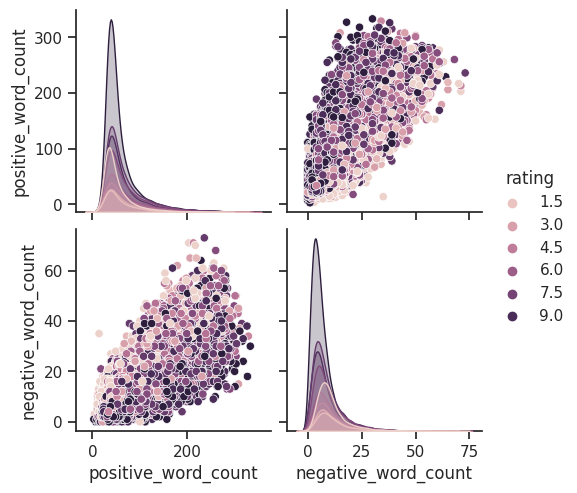

In [36]:
data = pd.concat([X_train[['positive_word_count', 'negative_word_count']], y_train], axis=1)
sns.pairplot(data, hue = "rating");
plt.show()

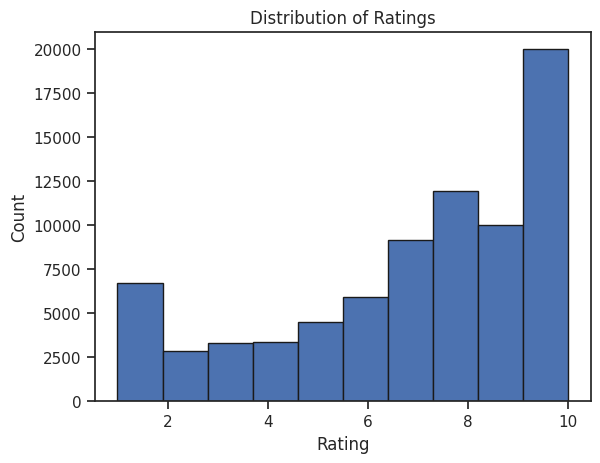

In [37]:
import matplotlib.pyplot as plt

# Plotting the "rating" values
plt.hist(dataset['rating'], bins=10, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

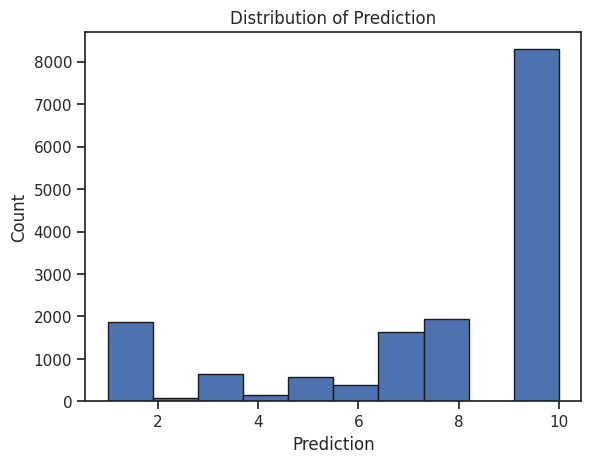

In [43]:
import matplotlib.pyplot as plt

# Plotting the "Prediction" values
plt.hist(pred_with_datas['prediction'], bins=10, edgecolor='k')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Distribution of Prediction')
plt.show()

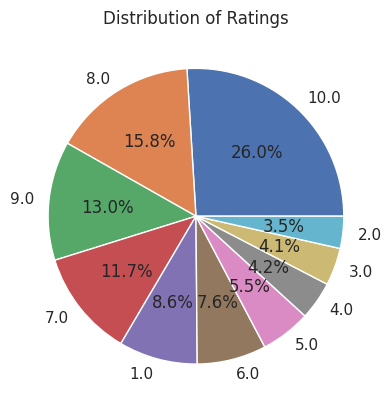

In [38]:
import matplotlib.pyplot as plt

# Count the frequency of each rating
rating_counts = pred_with_datas['prediction'].value_counts()

# Create a pie chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')

plt.show()


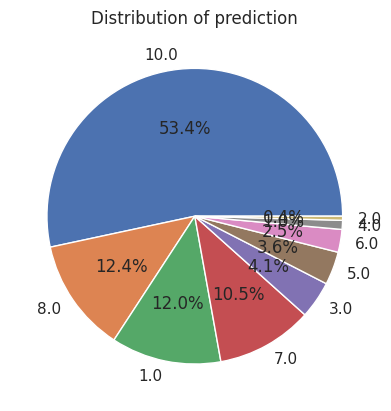

In [39]:
import matplotlib.pyplot as plt

# Count the frequency of each rating
prediction_counts = pred_with_datas['prediction'].value_counts()

# Create a pie chart
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%')
plt.title('Distribution of prediction')

plt.show()

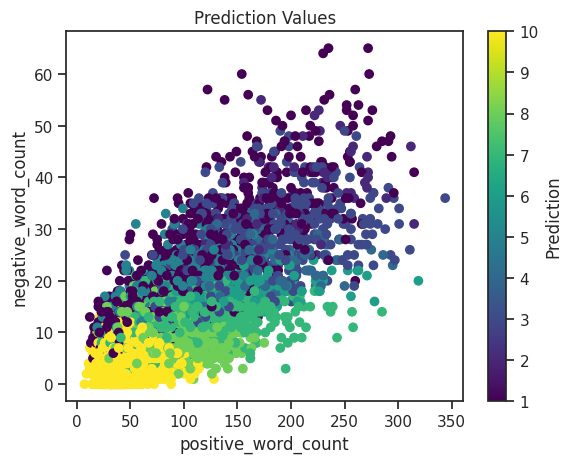

In [40]:
import matplotlib.pyplot as plt

# Plotting the "prediction" values
plt.scatter(pred_with_datas['positive_word_count'], pred_with_datas['negative_word_count'], c=pred_with_datas['prediction'], cmap='viridis')
plt.xlabel('positive_word_count')
plt.ylabel('negative_word_count')
plt.title('Prediction Values')
plt.colorbar(label='Prediction')
plt.show()
